[*********************100%***********************]  1 of 1 completed


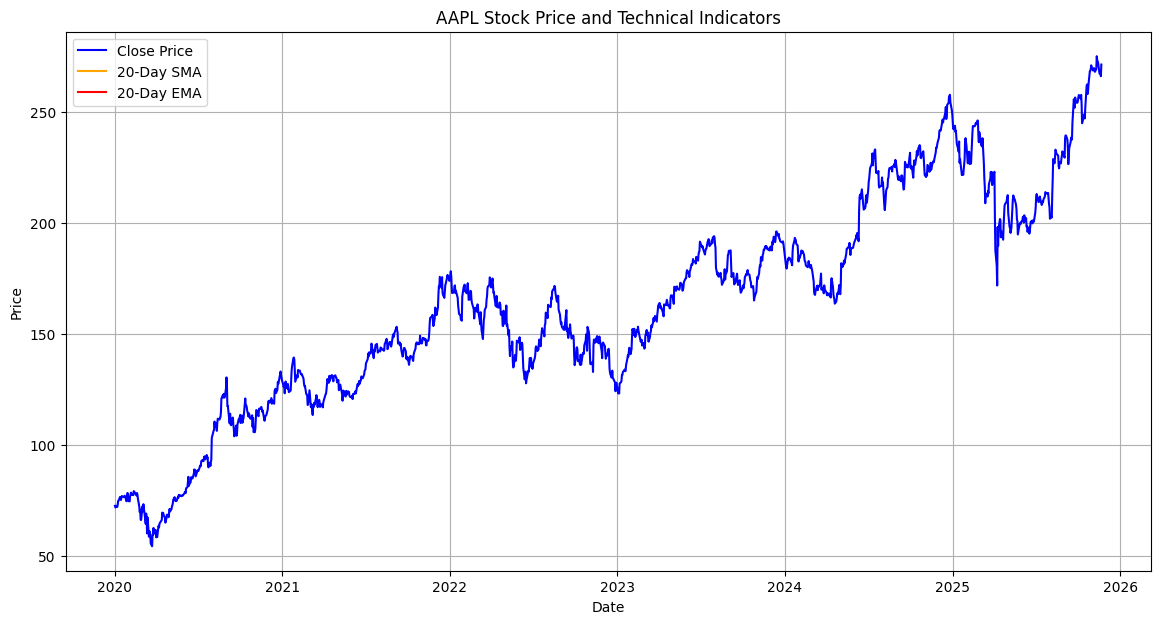

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set Plotly renderer for interactive plots
import plotly.io as pio
pio.renderers.default = "notebook"


def fetch_data(ticker, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
        ticker (str): The stock ticker symbol.
        start_date (str): The start date for fetching data (format: 'YYYY-MM-DD').
        end_date (str): The end date for fetching data (format: 'YYYY-MM-DD').

    Returns:
        pd.DataFrame: A DataFrame containing the stock price data.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data


def calculate_indicators(data):
    """
    Calculate technical indicators using the pandas_ta library.

    Parameters:
        data (pd.DataFrame): The stock price data.

    Returns:
        pd.DataFrame: The input DataFrame augmented with technical indicators.
    """
    data['SMA'] = ta.sma(data['Close'], length=20)  # Simple Moving Average
    data['EMA'] = ta.ema(data['Close'], length=20)  # Exponential Moving Average
    return data


def plot_data(data, ticker):
    """
    Plot the closing price along with technical indicators.

    Parameters:
        data (pd.DataFrame): The stock price data with indicators.
        ticker (str): The stock ticker symbol for labeling.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA'], label='20-Day SMA', color='orange')
    plt.plot(data['EMA'], label='20-Day EMA', color='red')
    plt.title(f'{ticker} Stock Price and Technical Indicators')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


def main():
    """
    Main function to execute the stock analysis workflow.
    """
    ticker = 'AAPL'  # Example ticker
    start_date = '2020-01-01'
    end_date = datetime.now().strftime('%Y-%m-%d')

    # Fetch data
    data = fetch_data(ticker, start_date, end_date)

    # Calculate indicators
    data = calculate_indicators(data)

    # Plot results
    plot_data(data, ticker)


if __name__ == "__main__":
    main()

In [13]:
df_news = load_news_data(r'C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\raw_analyst_ratings.csv'
    )
print("Columns in df_news:", df_news.columns)

Original 'date' entries for inspection:
0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
Name: date, dtype: object
Data type of 'date' column after conversion: datetime64[ns, UTC-04:00]
Columns in df_news: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'date_only'],
      dtype='object')


In [15]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def load_news_data(file_path):
    """Load and preprocess the news dataset."""
    try:
        # Load the dataset
        df = pd.read_csv(file_path)
        
        # Display the original 'date' column for inspection
        print("Original 'date' entries for inspection:")
        print(df['date'].head(20))
        
        # Attempt to convert the 'date' column to datetime with improved parsing
        def parse_dates(date_str):
            if '00:00:00' in date_str and not date_str.endswith('-04:00'):
                date_str += ' -04:00'
            return pd.to_datetime(date_str, errors='coerce')

        df['date'] = df['date'].apply(parse_dates)

        # Verify the data type of the 'date' column
        print("Data type of 'date' column after conversion:", df['date'].dtype)

        if df['date'].isnull().any():
            print("Warning: Some dates could not be parsed and will be set to NaT.")
            invalid_dates = df[df['date'].isna()]['date']
            print("Invalid original dates found:\n", invalid_dates)
        
        if not df['date'].isnull().all():
            df['date'] = df['date'].dt.tz_convert('America/New_York')
            df['date_only'] = df['date'].dt.date

        return df
    except Exception as e:
        print(f"Error loading news data: {e}")
        return None

def get_top_mentioned_stocks(df_news, top_n=5):
    """Get the top mentioned stocks from the news dataset."""
    stock_column = 'stock'  # Use the 'stock' column instead of 'stock_mentions'
    
    # Check if column exists
    if stock_column not in df_news.columns:
        print(f"Column '{stock_column}' not found in DataFrame.")
        return []

    # Handle the stock column; splitting if multiple stocks are mentioned
    stock_mentions = df_news[stock_column].str.split(',').explode().str.strip()
    top_stocks = stock_mentions.value_counts().head(top_n)
    
    return top_stocks.index.tolist()

def download_stock_data(top_stocks):
    """Download stock data for the given stocks."""
    # Placeholder: implement your own logic to download stock data
    # For demonstration, returning a DataFrame with mock data
    return pd.DataFrame({"Stock": top_stocks, "Price": [100] * len(top_stocks)})

def main():
    file_path = r'C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\raw_analyst_ratings.csv'
    
    # Load news data
    df_news = load_news_data(file_path)

    # If loading was successful, proceed to get top mentioned stocks
    if df_news is not None:
        top_stocks = get_top_mentioned_stocks(df_news)
        print("Top stocks:", top_stocks)

        # Download stock data for the retrieved top stocks
        all_data = download_stock_data(top_stocks)

        # Print the combined stock data
        print(all_data.head())

if __name__ == "__main__":
    main()

Original 'date' entries for inspection:
0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
Name: date, dtype: object
Data type of 'date' column after conversion: datetime64[ns, UTC-04:00]
Top stocks: ['MRK', 'MS', 'NVDA', 'MU', 'QQQ']
  Stock  Price
0   MRK    100
1    MS    100
2  NVDA    100
3    MU    100
4   QQQ    100


In [18]:
import yfinance as yf

def download_stock_data(symbols, start_date, end_date):
    """
    Download historical stock data for the given symbols.

    Parameters:
        symbols (list): A list of stock symbols to download.
        start_date (str): The start date for downloading data in 'YYYY-MM-DD' format.
        end_date (str): The end date for downloading data in 'YYYY-MM-DD' format.

    Returns:
        dict: A dictionary containing stock data for each symbol.
    """
    price_data = {}
    
    for symbol in symbols:
        print(f"Downloading data for {symbol}...")
        try:
            # Download data using yfinance
            data = yf.download(symbol, start=start_date, end=end_date, progress=False)
            if not data.empty:
                data['symbol'] = symbol  # Add symbol as a new column
                price_data[symbol] = data
        except Exception as e:
            print(f"Error downloading data for {symbol}: {e}")
    
    return price_data

def main():
    """
    Main function to execute the stock data download process.
    """
    # Define the stock symbols to retrieve data for
    top_stocks = ['MRK', 'MS', 'NVDA', 'MU', 'QQQ']
    
    # Define date range for the historical data
    start_date = "2018-01-01"
    end_date = "2025-11-23"
    
    # Call the function to download stock data
    price_data = download_stock_data(top_stocks, start_date, end_date)
    
    print("Downloaded prices for:", list(price_data.keys()))

# Entry point of the script
if __name__ == "__main__":
    main()

Downloaded prices for: ['MRK', 'MS', 'NVDA', 'MU', 'QQQ']


In [23]:

import yfinance as yf
import pandas as pd

def download_stock_data(symbols, start_date, end_date):
    """
    Download historical stock data for the given symbols.

    Parameters:
        symbols (list): A list of stock symbols to download.
        start_date (str): The start date for downloading data in 'YYYY-MM-DD' format.
        end_date (str): The end date for downloading data in 'YYYY-MM-DD' format.

    Returns:
        dict: A dictionary containing stock data for each symbol.
    """
    price_data = {}
    
    for symbol in symbols:
        print(f"Downloading data for {symbol}...")
        try:
            data = yf.download(symbol, start=start_date, end=end_date, progress=False)
            if not data.empty:
                data['symbol'] = symbol  # Add symbol as a new column
                price_data[symbol] = data
        except Exception as e:
            print(f"Error downloading data for {symbol}: {e}")
    
    return price_data

def display_specific_stock_data(price_data, symbol):
    """
    Display the stock data for a specific symbol and show the first few rows.

    Parameters:
        price_data (dict): The dictionary containing stock data for various symbols.
        symbol (str): The stock symbol whose data will be displayed.
    """
    if symbol in price_data:
        df = price_data[symbol].copy()  # Create a copy of the DataFrame for the symbol
        df = df.reset_index()  # Reset the index to convert date to a column
        print(f"\nData for {symbol}:")
        print(df.head())  # Display the first few rows of the DataFrame
    else:
        print(f"No data found for symbol: {symbol}")

def main():
    """
    Main function to execute the stock data download and display process.
    """
    top_stocks = ['MRK', 'MS', 'NVDA', 'MU', 'QQQ']  # Adjust your stock list as needed
    start_date = "2018-01-01"
    end_date = "2025-11-23"
    
    price_data = download_stock_data(top_stocks, start_date, end_date)
    
    # Specify which symbol's data you want to display
    symbol = "MRK"  # Change to TSLA, NVDA, etc. if you want
    display_specific_stock_data(price_data, symbol)

# Entry point of the script
if __name__ == "__main__":
    main()


Data for MRK:
Price        Date      Close       High        Low       Open    Volume symbol
Ticker                   MRK        MRK        MRK        MRK       MRK       
0      2018-01-02  42.259701  42.658094  42.131912  42.537825  10556504    MRK
1      2018-01-03  42.199574  42.289774  42.064269  42.267224  11090460    MRK
2      2018-01-04  42.883606  43.161730  42.379977  42.425078  15751650    MRK
3      2018-01-05  42.838501  43.139175  42.537827  43.139175   9955057    MRK
4      2018-01-08  42.590443  43.033939  42.470173  43.003870  11642546    MRK


In [33]:
import pandas as pd
import numpy as np
import ta  # Ensure this library is correctly imported

def create_sample_dataframe(num_rows=100):
    """
    Generates a sample DataFrame with random 'Close' prices and 'Volume'.
    
    Parameters:
        num_rows (int): Number of rows in the DataFrame.
    
    Returns:
        pd.DataFrame: DataFrame containing 'Close' and 'Volume' columns.
    """
    data = {
        'Close': np.random.random(num_rows) * 100,
        'Volume': np.random.randint(100, 1000, size=num_rows)
    }
    return pd.DataFrame(data)

def add_technical_indicators(df):
    """
    Adds various technical indicators to the DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'Close' and 'Volume' columns.
    
    Returns:
        pd.DataFrame: DataFrame with added technical indicators.
    """
    # Add Simple Moving Averages
    df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
    df['SMA_50'] = ta.trend.sma_indicator(df['Close'], window=50)

    # Add Exponential Moving Averages
    df['EMA_12'] = ta.trend.ema_indicator(df['Close'], window=12)
    df['EMA_26'] = ta.trend.ema_indicator(df['Close'], window=26)

    # Add Relative Strength Index (RSI)
    df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

    # Add MACD (Moving Average Convergence Divergence)
    macd = ta.trend.macd(df['Close'])
    df = pd.concat([df, macd], axis=1)

    # Add Bollinger Bands
    bb = ta.volatility.BollingerBands(df['Close'], window=20)
    df['Bollinger_High'] = bb.bollinger_hband()
    df['Bollinger_Low'] = bb.bollinger_lband()

    # Add Volume SMA
    df['Volume_SMA'] = ta.trend.sma_indicator(df['Volume'], window=20)

    return df

def main():
    """
    Main function to execute the DataFrame creation and indicator addition.
    """
    # Create sample DataFrame
    df = create_sample_dataframe()

    # Add technical indicators to the DataFrame
    df = add_technical_indicators(df)

    # Output results
    print("Indicators calculated!")
    print(df.tail())

if __name__ == "__main__":
    main()

Indicators calculated!
        Close  Volume     SMA_20     SMA_50     EMA_12     EMA_26        RSI  \
95  92.029753     191  53.330182  54.279078  60.898921  55.559642  54.782680   
96  96.196478     934  54.223268  54.249020  66.329315  58.569778  55.269463   
97  43.888407     290  54.053695  53.252427  62.876868  57.482269  48.247429   
98  89.232168     314  56.884406  53.344959  66.931529  59.834114  53.734815   
99  54.836083     618  57.377377  53.494697  65.070691  59.463889  49.451417   

    MACD_12_26  Bollinger_High  Bollinger_Low  Volume_SMA  
95    5.339279      107.867688      -1.207324      471.20  
96    7.759537      110.911957      -2.465420      489.60  
97    5.394598      110.844646      -2.737256      471.85  
98    7.097415      114.752939      -0.984128      454.60  
99    5.606802      114.999207      -0.244453      465.40  


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go  # Importing required module
import ta  # Assuming you have already defined your indicators
import kaleido

"""
    Create a DataFrame with random Open, High, Low, Close prices.
    
    Parameters:
    - start_date (str): The starting date for the DataFrame.
    - periods (int): The number of periods (days) for the DataFrame.
    
    Returns:
    - pd.DataFrame: DataFrame with Date, Open, High, Low, Close prices.
    """

# Example DataFrame creation (you should replace this with your actual DataFrame)
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100),
    'Open': np.random.random(100) * 100,
    'High': np.random.random(100) * 100,
    'Low': np.random.random(100) * 100,
    'Close': np.random.random(100) * 100,
}
df = pd.DataFrame(data)

# Add indicators to the DataFrame (example calculations)
df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['SMA_50'] = ta.trend.sma_indicator(df['Close'], window=50)
df['EMA_12'] = ta.trend.ema_indicator(df['Close'], window=12)
df['EMA_26'] = ta.trend.ema_indicator(df['Close'], window=26)
"""
    Create an interactive candlestick plot with indicators and save it to a file.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing stock price data and indicators.
    - save_path (str): The file path where the plot will be saved.
    """
# Interactive Candlestick + Indicators
fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Price'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_20'], name='SMA 20', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_50'], name='SMA 50', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA_12'], name='EMA 12', line=dict(color='purple', dash='dot')))

fig.update_layout(title=f"Price + Moving Averages", xaxis_rangeslider_visible=False)
fig.show()

fig.write_image('plots/InteractiveCandlestick_Indicators.png')
plt.show()

ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


In [ ]:
# RSI Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], name='RSI'))
fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought")
fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold")
fig.update_layout(title=f"{symbol} RSI (14)")
fig.show()

In [ ]:
# MACD Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['MACD_12_26_9'], name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MACDs_12_26_9'], name='Signal'))
fig.add_trace(go.Bar(x=df['Date'], y=df['MACDh_12_26_9'], name='Histogram'))
fig.update_layout(title=f"{symbol} MACD")
fig.show()

In [ ]:
# MACD Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['MACD_12_26_9'], name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MACDs_12_26_9'], name='Signal'))
fig.add_trace(go.Bar(x=df['Date'], y=df['MACDh_12_26_9'], name='Histogram'))
fig.update_layout(title=f"{symbol} MACD")
fig.show()

In [ ]:
# Get news for this stock only
news_stock = df_news[df_news['stock'] == symbol].copy()
news_dates = news_stock['date_only'].value_counts().index

# Mark news days on price chart
fig = go.Figure()
fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='Price'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_20'], name='SMA 20', line=dict(color='orange')))

# Add vertical lines on high-news days
high_news_days = news_stock['date_only'].value_counts()
high_news_days = high_news_days[high_news_days > high_news_days.quantile(0.9)].index

for date in high_news_days:
    if date in df['Date'].dt.date.values:
        fig.add_vline(x=pd.to_datetime(date), line=dict(color="red", dash="dot"), opacity=0.4)

fig.update_layout(title=f"{symbol} Price with High News Volume Days Marked (Red Dotted Lines)")
fig.show()

In [ ]:
import os
os.makedirs("plots/task2", exist_ok=True)

# Save as HTML (interactive!)
fig.write_html(f"plots/plots/task2/{symbol}_candlestick_sma.html")
fig.write_html(f"plots/plots/task2/{symbol}_rsi.html")
fig.write_html(f"plots/plots/task2/{symbol}_macd.html")